#Credit Score Classification using Neural Network
- The dataset we use to day contain related data , the goal is to create a model to classify customer base on credit score to prevent manual effort

In [ ]:
# !pip install tensorflow==2.12.0

In [65]:
#Import Required Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats.contingency import chi2_contingency
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn.model_selection import train_test_split   # split dataset to train and test section
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, RobustScaler, LabelEncoder, StandardScaler # data preprocessing
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, precision_score, classification_report #evaluational module
from sklearn.pipeline import Pipeline  #Merging all process step(preprocessing, feature selection, trainning) in to a sequence
from sklearn.utils.class_weight import compute_class_weight # compute weight (w)

import tensorflow as tf
from keras import models
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from imblearn.over_sampling import SMOTE
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns

In [5]:
raw_train_df = pd.read_csv('train.csv')
raw_test_df = pd.read_csv('test.csv')

train_df = raw_train_df.copy()
test_df = raw_test_df.copy()

In [6]:
train_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [8]:
test_df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,42502.000000,50000.000000,50000.000000,50000.000000,50000.000000,48965.000000,50000.000000,50000.000000
mean,4182.004291,16.838260,22.921480,68.772640,21.052640,30.080200,32.279581,1491.304305
std,3174.109304,116.396848,129.314804,451.602363,14.860397,196.984121,5.106238,8595.647887
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.509652,0.000000
25%,1625.188333,3.000000,4.000000,8.000000,10.000000,4.000000,28.061040,32.222388
50%,3086.305000,6.000000,5.000000,13.000000,18.000000,7.000000,32.280390,74.733349
75%,5934.189094,7.000000,7.000000,20.000000,28.000000,10.000000,36.468591,176.157491
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2593.000000,48.540663,82398.000000


In [9]:
train_df.shape

(100000, 28)

In [10]:
test_df.shape

(50000, 27)

If you want to have full view about two dataframe, use concat

In [11]:
df = pd.concat([train_df, test_df])

In [12]:
df.shape

(150000, 28)

Save full df to csv file

In [13]:
df.to_csv('full.csv', index=False)

In [14]:
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,15000
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,22500
Num_Bank_Accounts,0


In [15]:
# prompt: give me code to count number of each unique value in Credit_mix column\

credit_mix_counts = df['Credit_Mix'].value_counts()
credit_mix_counts


,count
Credit_Mix,
Standard,54858
Good,36597
_,30000
Bad,28545


There are some missing values, we need to handle it to prevent bad effot to our model

##Feature selection

In [16]:
df = df[df['Payment_Behaviour'] != '!@9#%8']
df[['Spending_Level', 'Payment_Value']] = df['Payment_Behaviour'].str.split('_', n=1, expand=True) #Split the column to 2 columns to increase feature
df['Payment_Value'] = df['Payment_Value'].str.rsplit('_', n=1, expand=True)[0]  # eg. Small_value_payment --> Small
df['Payment_Value'] = df['Payment_Value'].str.rsplit('_', n=1, expand=True)[0]  # ---------------------------------
df['Payment_Value'] = df['Payment_Value'].str.replace('spent_', '') # eg.High_spent ---> High

In [17]:

#Spliting with train_df
train_df = train_df[train_df['Payment_Behaviour'] != '!@9#%8']
train_df[['Spending_Level', 'Payment_Value']] = train_df['Payment_Behaviour'].str.split('_', n=1, expand=True) #Split the column to 2 columns to increase feature
train_df['Payment_Value'] = train_df['Payment_Value'].str.rsplit('_', n=1, expand=True)[0]  # eg. Small_value_payment --> Small
train_df['Payment_Value'] = train_df['Payment_Value'].str.rsplit('_', n=1, expand=True)[0]  # ---------------------------------
train_df['Payment_Value'] = train_df['Payment_Value'].str.replace('spent_', '') # eg.High_spent ---> High


In [18]:
# Cleaning and Feature Engineering for test_df
test_df = test_df[test_df['Payment_Behaviour'] != '!@9#%8']
test_df[['Spending_Level', 'Payment_Value']] = test_df['Payment_Behaviour'].str.split('_', n=1, expand=True)
test_df['Payment_Value'] = test_df['Payment_Value'].str.rsplit('_', n=1, expand=True)[0]
test_df['Payment_Value'] = test_df['Payment_Value'].str.rsplit('_', n=1, expand=True)[0]
test_df['Payment_Value'] = test_df['Payment_Value'].str.replace('spent_', '')

In [19]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Spending_Level,Payment_Value
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,High,Small
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,Low,Large
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,Low,Medium
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,Low,Small
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,High,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343,NaN,Low,Small
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066,NaN,Low,Small
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098,NaN,Low,Large
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717,NaN,High,Small


In [20]:
train_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Spending_Level,Payment_Value
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,High,Small
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,Low,Large
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,Low,Medium
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,Low,Small
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,High,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0x25fe8,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,410.256158,Poor,High,Medium
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor,High,Large
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor,High,Medium
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor,High,Large


We can see that now from ***'Payment_Behaviour'***  column, now we have two new columns is ***'Spending_Level',	'Payment_Value'***

Beacause "Age" column's dtype is object, so we need to turn it into numeric dtype

In [21]:
# drop_columns = ['ID', 'Customer_ID', 'Name', 'SSN', 'Month','Type_of_Loan', 'Payment_Behaviour']
# df.drop(drop_columns, axis=1, inplace=True)

In [22]:
df.shape

(138600, 30)

In [23]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Spending_Level,Payment_Value
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,High,Small
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,Low,Large
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,Low,Medium
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,Low,Small
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,High,Medium


##Split df into Categorical column and  numerical column

In [24]:
num_cols = ["Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card","Interest_Rate","Num_of_Loan", "Delay_from_due_date","Num_of_Delayed_Payment","Changed_Credit_Limit", "Num_Credit_Inquiries","Outstanding_Debt","Credit_Utilization_Ratio","Total_EMI_per_month","Amount_invested_monthly",	"Monthly_Balance","Credit_History_Age"]
cat_cols = ["Occupation","Credit_Mix", "Spending_Level","Payment_Value","Payment_of_Min_Amount"]
target_col = ["Credit_Score"]

In [25]:
df['Age'].dtype

dtype('O')

##Numerical Column Preprocessing


In [26]:
class DataCleaner:
    def __init__(self, dataframe, numeric_columns):
        self.dataframe = dataframe
        self.numeric_columns = numeric_columns

    def clean_numeric_columns(self):

        for col in self.numeric_columns:

            if self.dataframe[col].dtype == 'object':
                self.dataframe[col] = self.dataframe[col].str.extract(r'(\d+)')   #extract and capture only numeric value, digit that  > 0
                self.dataframe[col] = pd.to_numeric(self.dataframe[col], errors='coerce') # convert string number to actual number
                self.dataframe[col] = self.dataframe[col].fillna(self.dataframe[col].median()) #fill missing value by median method

            else:
                self.dataframe[col] = self.dataframe[col].fillna(self.dataframe[col].median()) #fill missing value by median method, but if other codition not satisfied

        return self.dataframe # return our datframe



cleaner = DataCleaner(df, num_cols)
df = cleaner.clean_numeric_columns()

- To explain why we need to do this step, because some element in some numerical column have some no-numerical value or weird value like (eg. -500 yo ??)
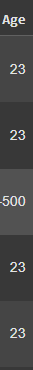

##Visualize and Analysis Data

In [27]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Spending_Level,Payment_Value
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114,1824.843333,3,...,26.822620,22.0,No,49.574949,80.0,High_spent_Small_value_payments,312.0,Good,High,Small
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114,3088.475000,3,...,31.944960,18.0,No,49.574949,118.0,Low_spent_Large_value_payments,284.0,Good,Low,Large
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114,3088.475000,3,...,28.609352,22.0,No,49.574949,81.0,Low_spent_Medium_value_payments,331.0,Good,Low,Medium
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114,3088.475000,3,...,31.377862,22.0,No,49.574949,199.0,Low_spent_Small_value_payments,223.0,Good,Low,Small
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114,1824.843333,3,...,24.797347,22.0,No,49.574949,41.0,High_spent_Medium_value_payments,341.0,Good,High,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002,1929.906667,10,...,34.780553,18.0,Yes,60.964772,146.0,Low_spent_Small_value_payments,275.0,NaN,Low,Small
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628,3088.475000,4,...,27.758522,31.0,NM,35.104023,181.0,Low_spent_Small_value_payments,409.0,NaN,Low,Small
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628,3359.415833,4,...,36.858542,32.0,No,35.104023,10000.0,Low_spent_Large_value_payments,349.0,NaN,Low,Large
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628,3088.475000,4,...,39.139840,32.0,No,35.104023,97.0,High_spent_Small_value_payments,463.0,NaN,High,Small


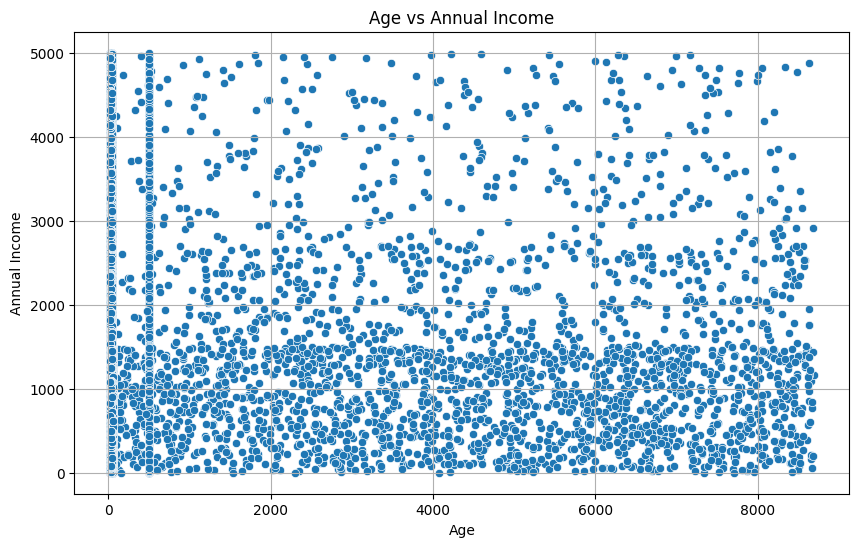

In [28]:
#age and annual income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Outstanding_Debt', data=df)
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.grid(True)
plt.show()

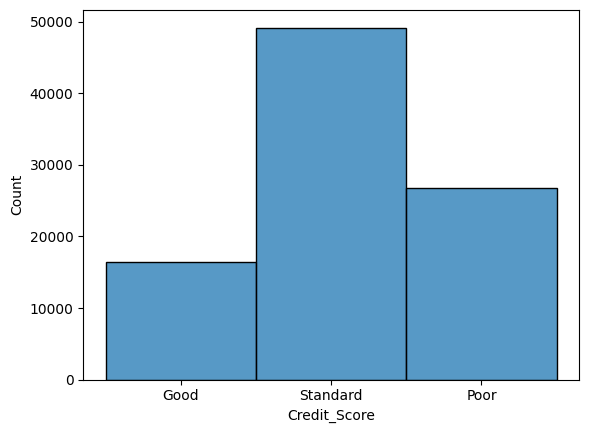

In [29]:
plt.plot(figsize = (5,4))
sns.histplot(df['Credit_Score'])
plt.savefig("credit_score.png")
plt.show()

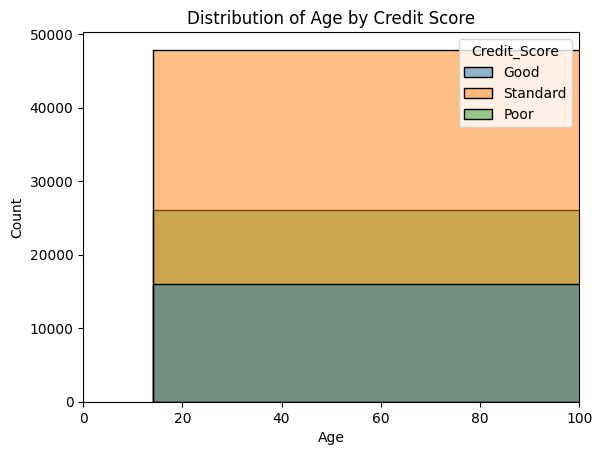

In [30]:
sns.histplot(data=df, x='Age', hue='Credit_Score', bins=20, kde=False)
plt.title('Distribution of Age by Credit Score')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xlim(0, 100)  # Set age range
plt.show()

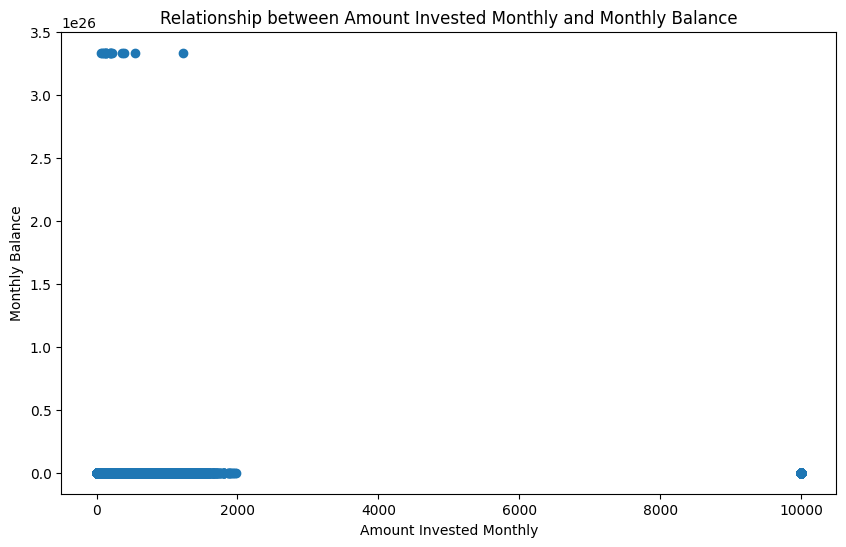

In [31]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(data=df, x='Amount_invested_monthly', y='Monthly_Balance')
plt.title('Relationship between Amount Invested Monthly and Monthly Balance')
plt.xlabel('Amount Invested Monthly')
plt.ylabel('Monthly Balance')
plt.show()

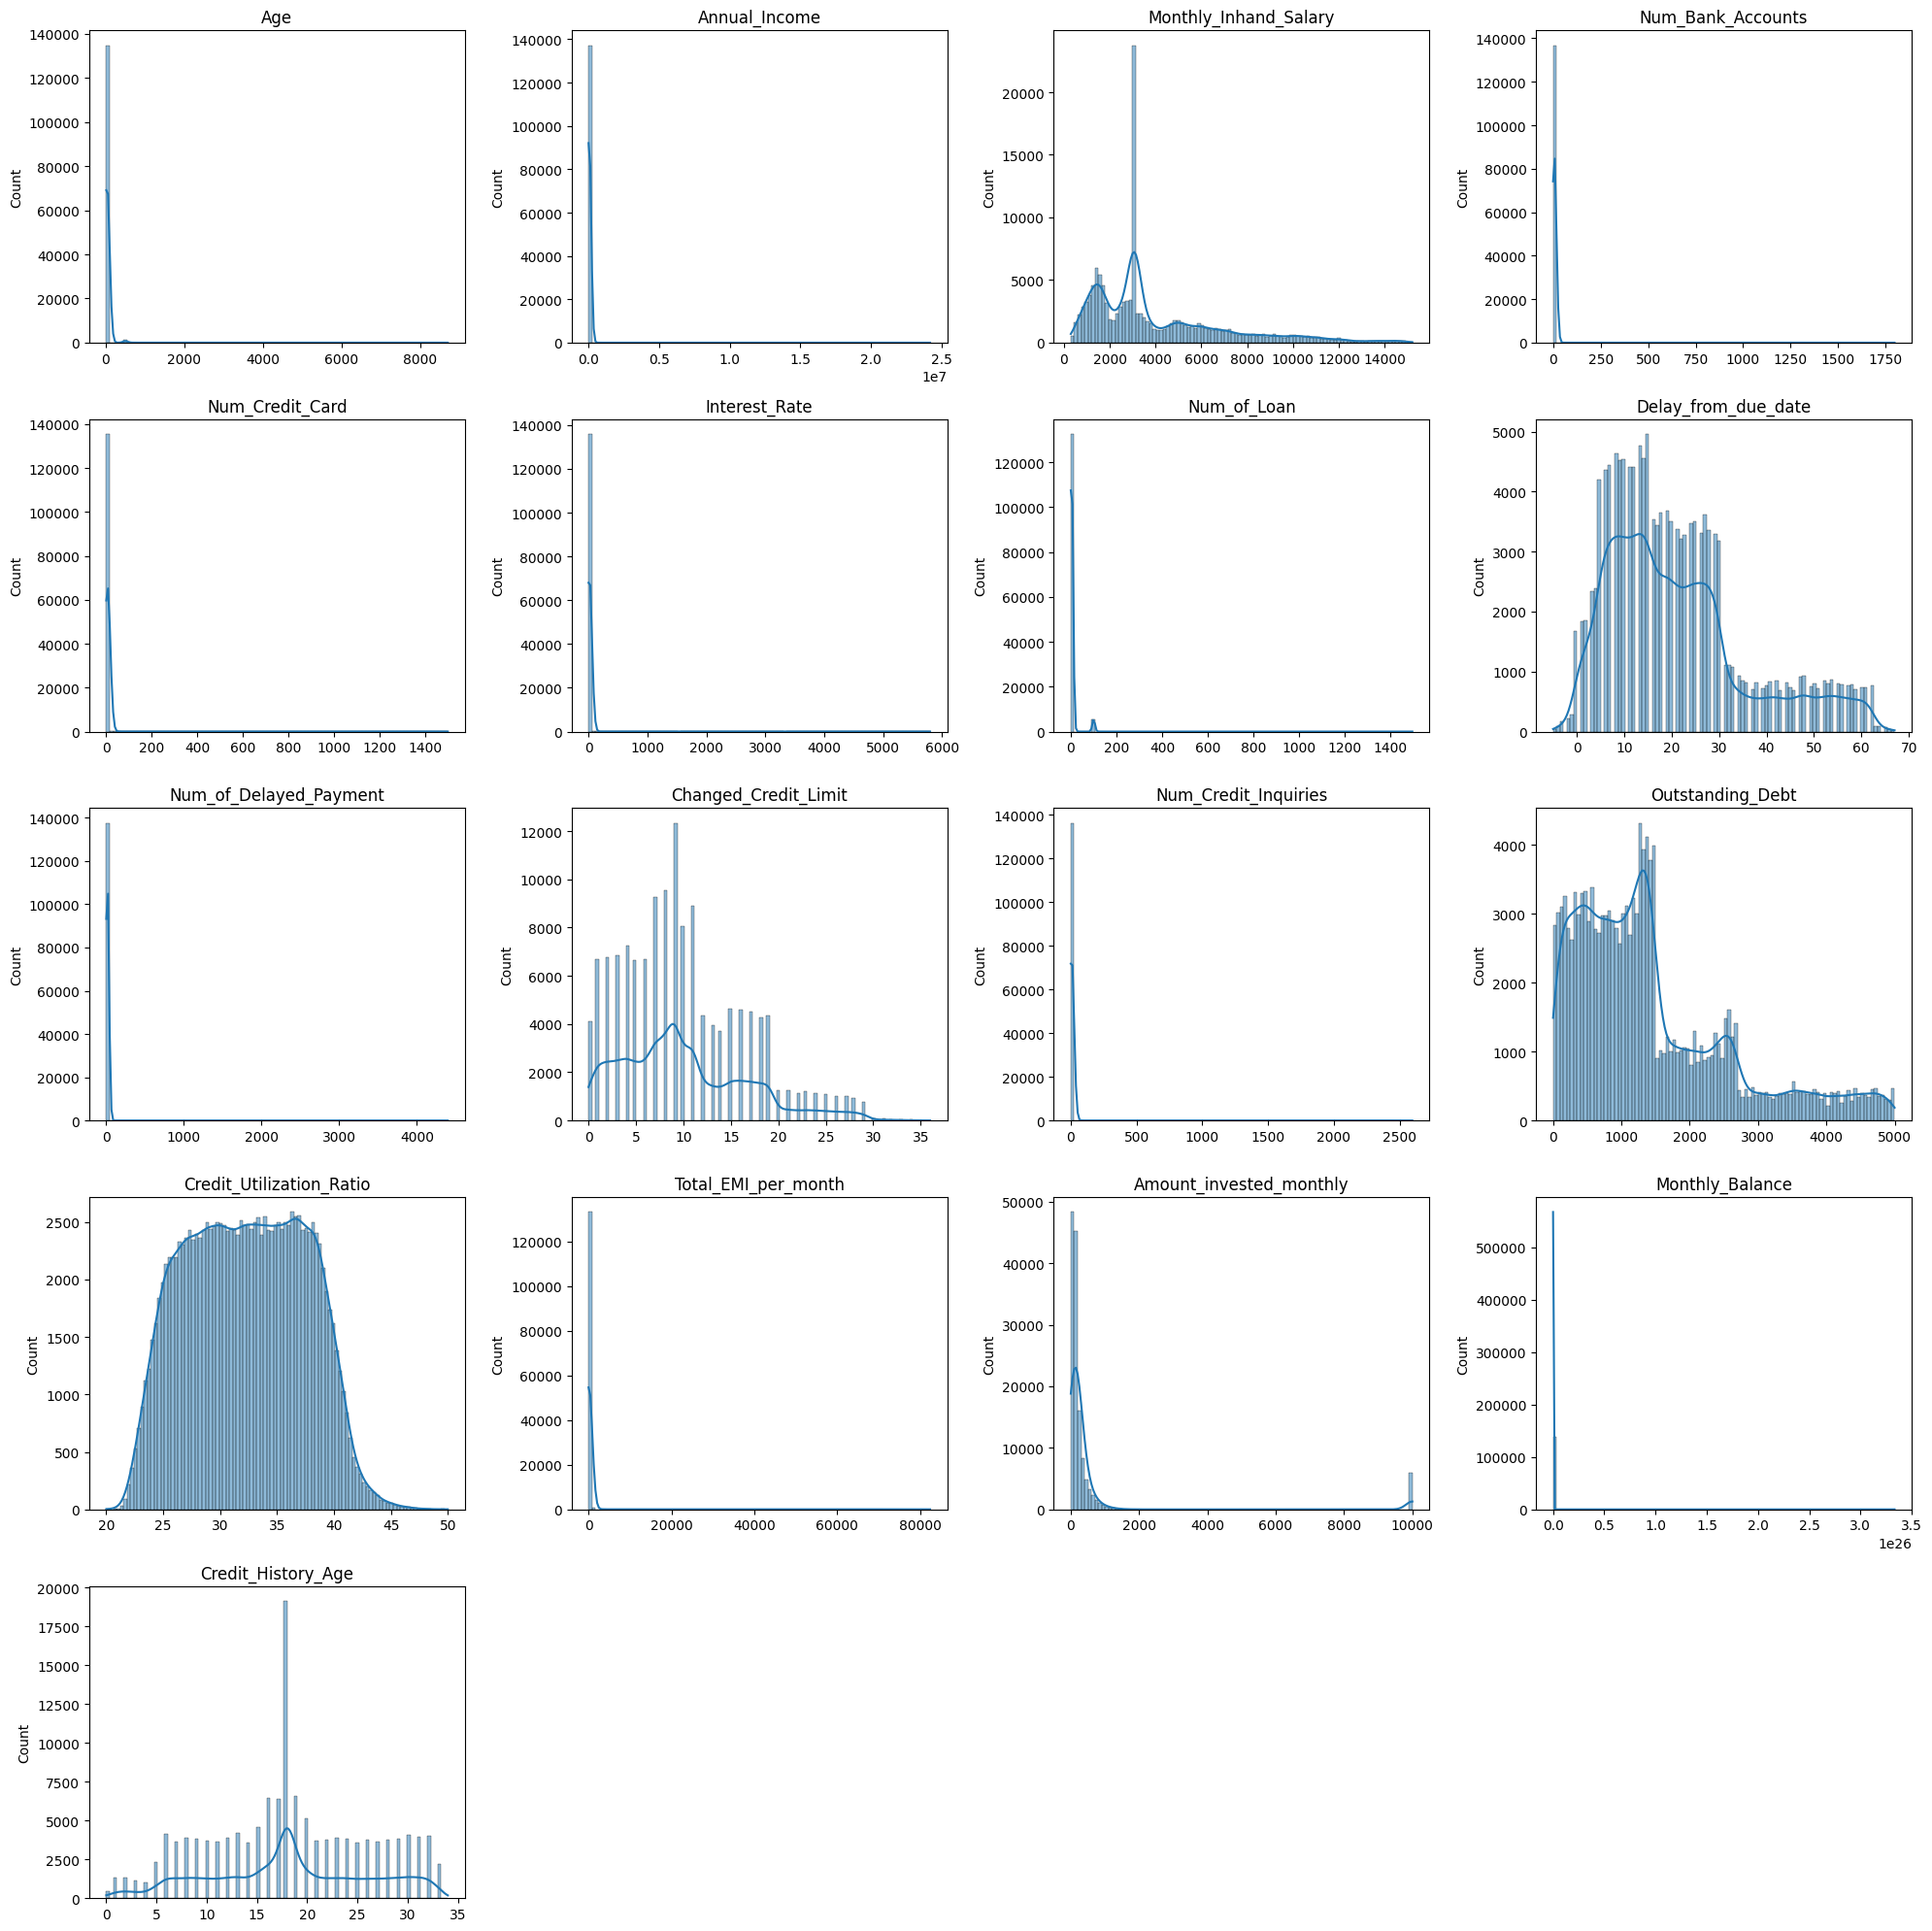

In [32]:
# Counting number of unique element in each column
def plot_histograms(df, columns, rows=2, cols=3):

    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
    axes = axes.flatten() # 2D --> 1D, easier to plot by using iteration

    for i, col in enumerate(columns):
        if i < len(axes):
            sns.histplot(df[col], kde=True, ax=axes[i], bins=100) #kernal density estimate(kde) help to provide smoother line
            axes[i].set_title(col) # title
            axes[i].set_xlabel('')

    # Remove unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_histograms(df, num_cols, rows=5, cols=4)

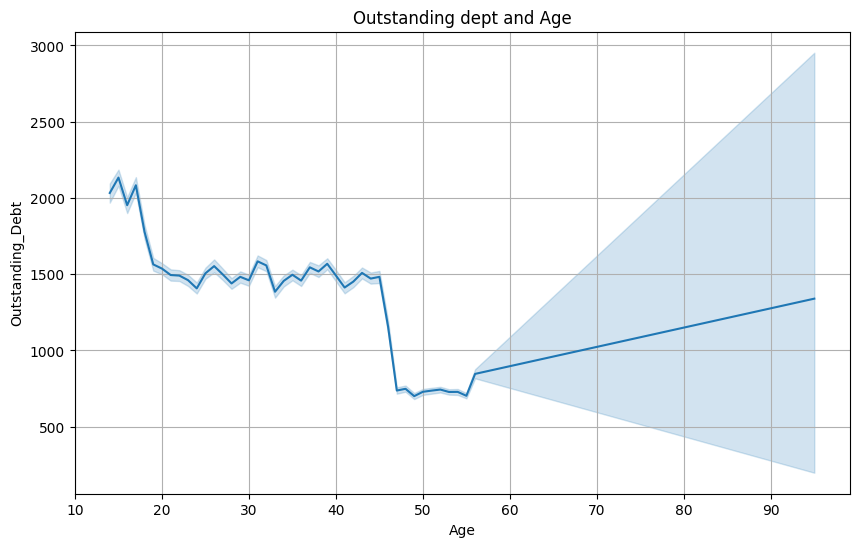

In [33]:
plt.figure(figsize=(10, 6))
import seaborn as sns

sns.lineplot(x='Age', y='Outstanding_Debt', data=df[df['Age'] < 100])
plt.title('Outstanding dept and Age')
plt.xlabel('Age')
plt.ylabel('Outstanding_Debt')
plt.grid(True)
plt.savefig("figure_1.png")
plt.show()


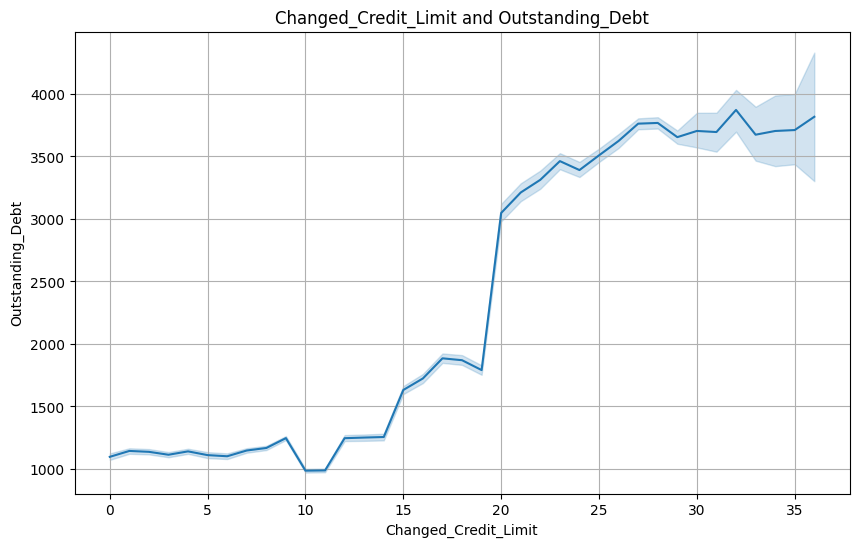

In [34]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=df['Changed_Credit_Limit'], y=df['Outstanding_Debt'], data=df)
plt.title('Changed_Credit_Limit and Outstanding_Debt')
plt.xlabel('Changed_Credit_Limit')
plt.ylabel('Outstanding_Debt')
plt.grid(True)
plt.savefig("figure_2.png")
plt.show()


In [35]:
df = df[df["Credit_History_Age"] != 0] #Extract no Zero-element

In [36]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Spending_Level,Payment_Value
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114,1824.843333,3,...,26.822620,22.0,No,49.574949,80.0,High_spent_Small_value_payments,312.0,Good,High,Small
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114,3088.475000,3,...,31.944960,18.0,No,49.574949,118.0,Low_spent_Large_value_payments,284.0,Good,Low,Large
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114,3088.475000,3,...,28.609352,22.0,No,49.574949,81.0,Low_spent_Medium_value_payments,331.0,Good,Low,Medium
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114,3088.475000,3,...,31.377862,22.0,No,49.574949,199.0,Low_spent_Small_value_payments,223.0,Good,Low,Small
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114,1824.843333,3,...,24.797347,22.0,No,49.574949,41.0,High_spent_Medium_value_payments,341.0,Good,High,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002,1929.906667,10,...,34.780553,18.0,Yes,60.964772,146.0,Low_spent_Small_value_payments,275.0,NaN,Low,Small
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628,3088.475000,4,...,27.758522,31.0,NM,35.104023,181.0,Low_spent_Small_value_payments,409.0,NaN,Low,Small
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628,3359.415833,4,...,36.858542,32.0,No,35.104023,10000.0,Low_spent_Large_value_payments,349.0,NaN,Low,Large
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628,3088.475000,4,...,39.139840,32.0,No,35.104023,97.0,High_spent_Small_value_payments,463.0,NaN,High,Small


In [37]:
df['Credit_History_Age'].describe()

,Credit_History_Age
count,138122.000000
mean,18.195074
std,7.873462
min,1.000000
25%,13.000000
50%,18.000000
75%,24.000000
max,34.000000


In [38]:
df[df['Credit_History_Age'] < 0].sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0.0
Num_Bank_Accounts,0


In [39]:
df[num_cols].corr()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age
Age,1.000000,-0.001768,0.003266,0.004014,0.000400,-0.002585,0.001571,-0.004674,-0.000448,-0.001613,-0.002159,-0.001881,0.001237,0.002209,0.002096,-0.001272,-0.000548
Annual_Income,-0.001768,1.000000,0.027497,-0.002769,-0.000082,-0.002230,-0.000685,-0.008368,0.001104,-0.002879,0.002193,-0.005579,0.006511,-0.001132,-0.001372,-0.000864,0.001354
Monthly_Inhand_Salary,0.003266,0.027497,1.000000,-0.011270,-0.003551,-0.008916,-0.007921,-0.226625,-0.001465,-0.158818,-0.007483,-0.245200,0.156585,0.010074,0.053120,0.002022,0.237664
Num_Bank_Accounts,0.004014,-0.002769,-0.011270,1.000000,0.002094,-0.001492,-0.000794,0.016015,-0.002051,0.008395,-0.000866,0.014179,-0.002171,0.000284,0.000983,-0.001145,-0.010314
Num_Credit_Card,0.000400,-0.000082,-0.003551,0.002094,1.000000,-0.002552,-0.000982,0.008927,0.002324,0.005802,-0.002357,0.005607,-0.002437,0.003161,-0.004661,-0.001399,-0.007216
Interest_Rate,-0.002585,-0.002230,-0.008916,-0.001492,-0.002552,1.000000,0.000584,0.012152,0.002986,0.004303,-0.002462,0.011366,-0.003290,0.002320,-0.000685,-0.001352,-0.011650
Num_of_Loan,0.001571,-0.000685,-0.007921,-0.000794,-0.000982,0.000584,1.000000,0.015254,0.006179,0.011601,-0.000221,0.022826,-0.005453,-0.001631,0.002201,-0.001302,-0.019302
Delay_from_due_date,-0.004674,-0.008368,-0.226625,0.016015,0.008927,0.012152,0.015254,1.000000,0.013813,0.291393,0.008878,0.569334,-0.066670,-0.001972,-0.010154,-0.003338,-0.465434
Num_of_Delayed_Payment,-0.000448,0.001104,-0.001465,-0.002051,0.002324,0.002986,0.006179,0.013813,1.000000,0.008754,-0.000407,0.010247,-0.001441,0.000388,-0.000785,-0.000947,-0.010705
Changed_Credit_Limit,-0.001613,-0.002879,-0.158818,0.008395,0.005802,0.004303,0.011601,0.291393,0.008754,1.000000,0.007140,0.458035,-0.048217,-0.002076,-0.010884,-0.002525,-0.402414


##Heatmap

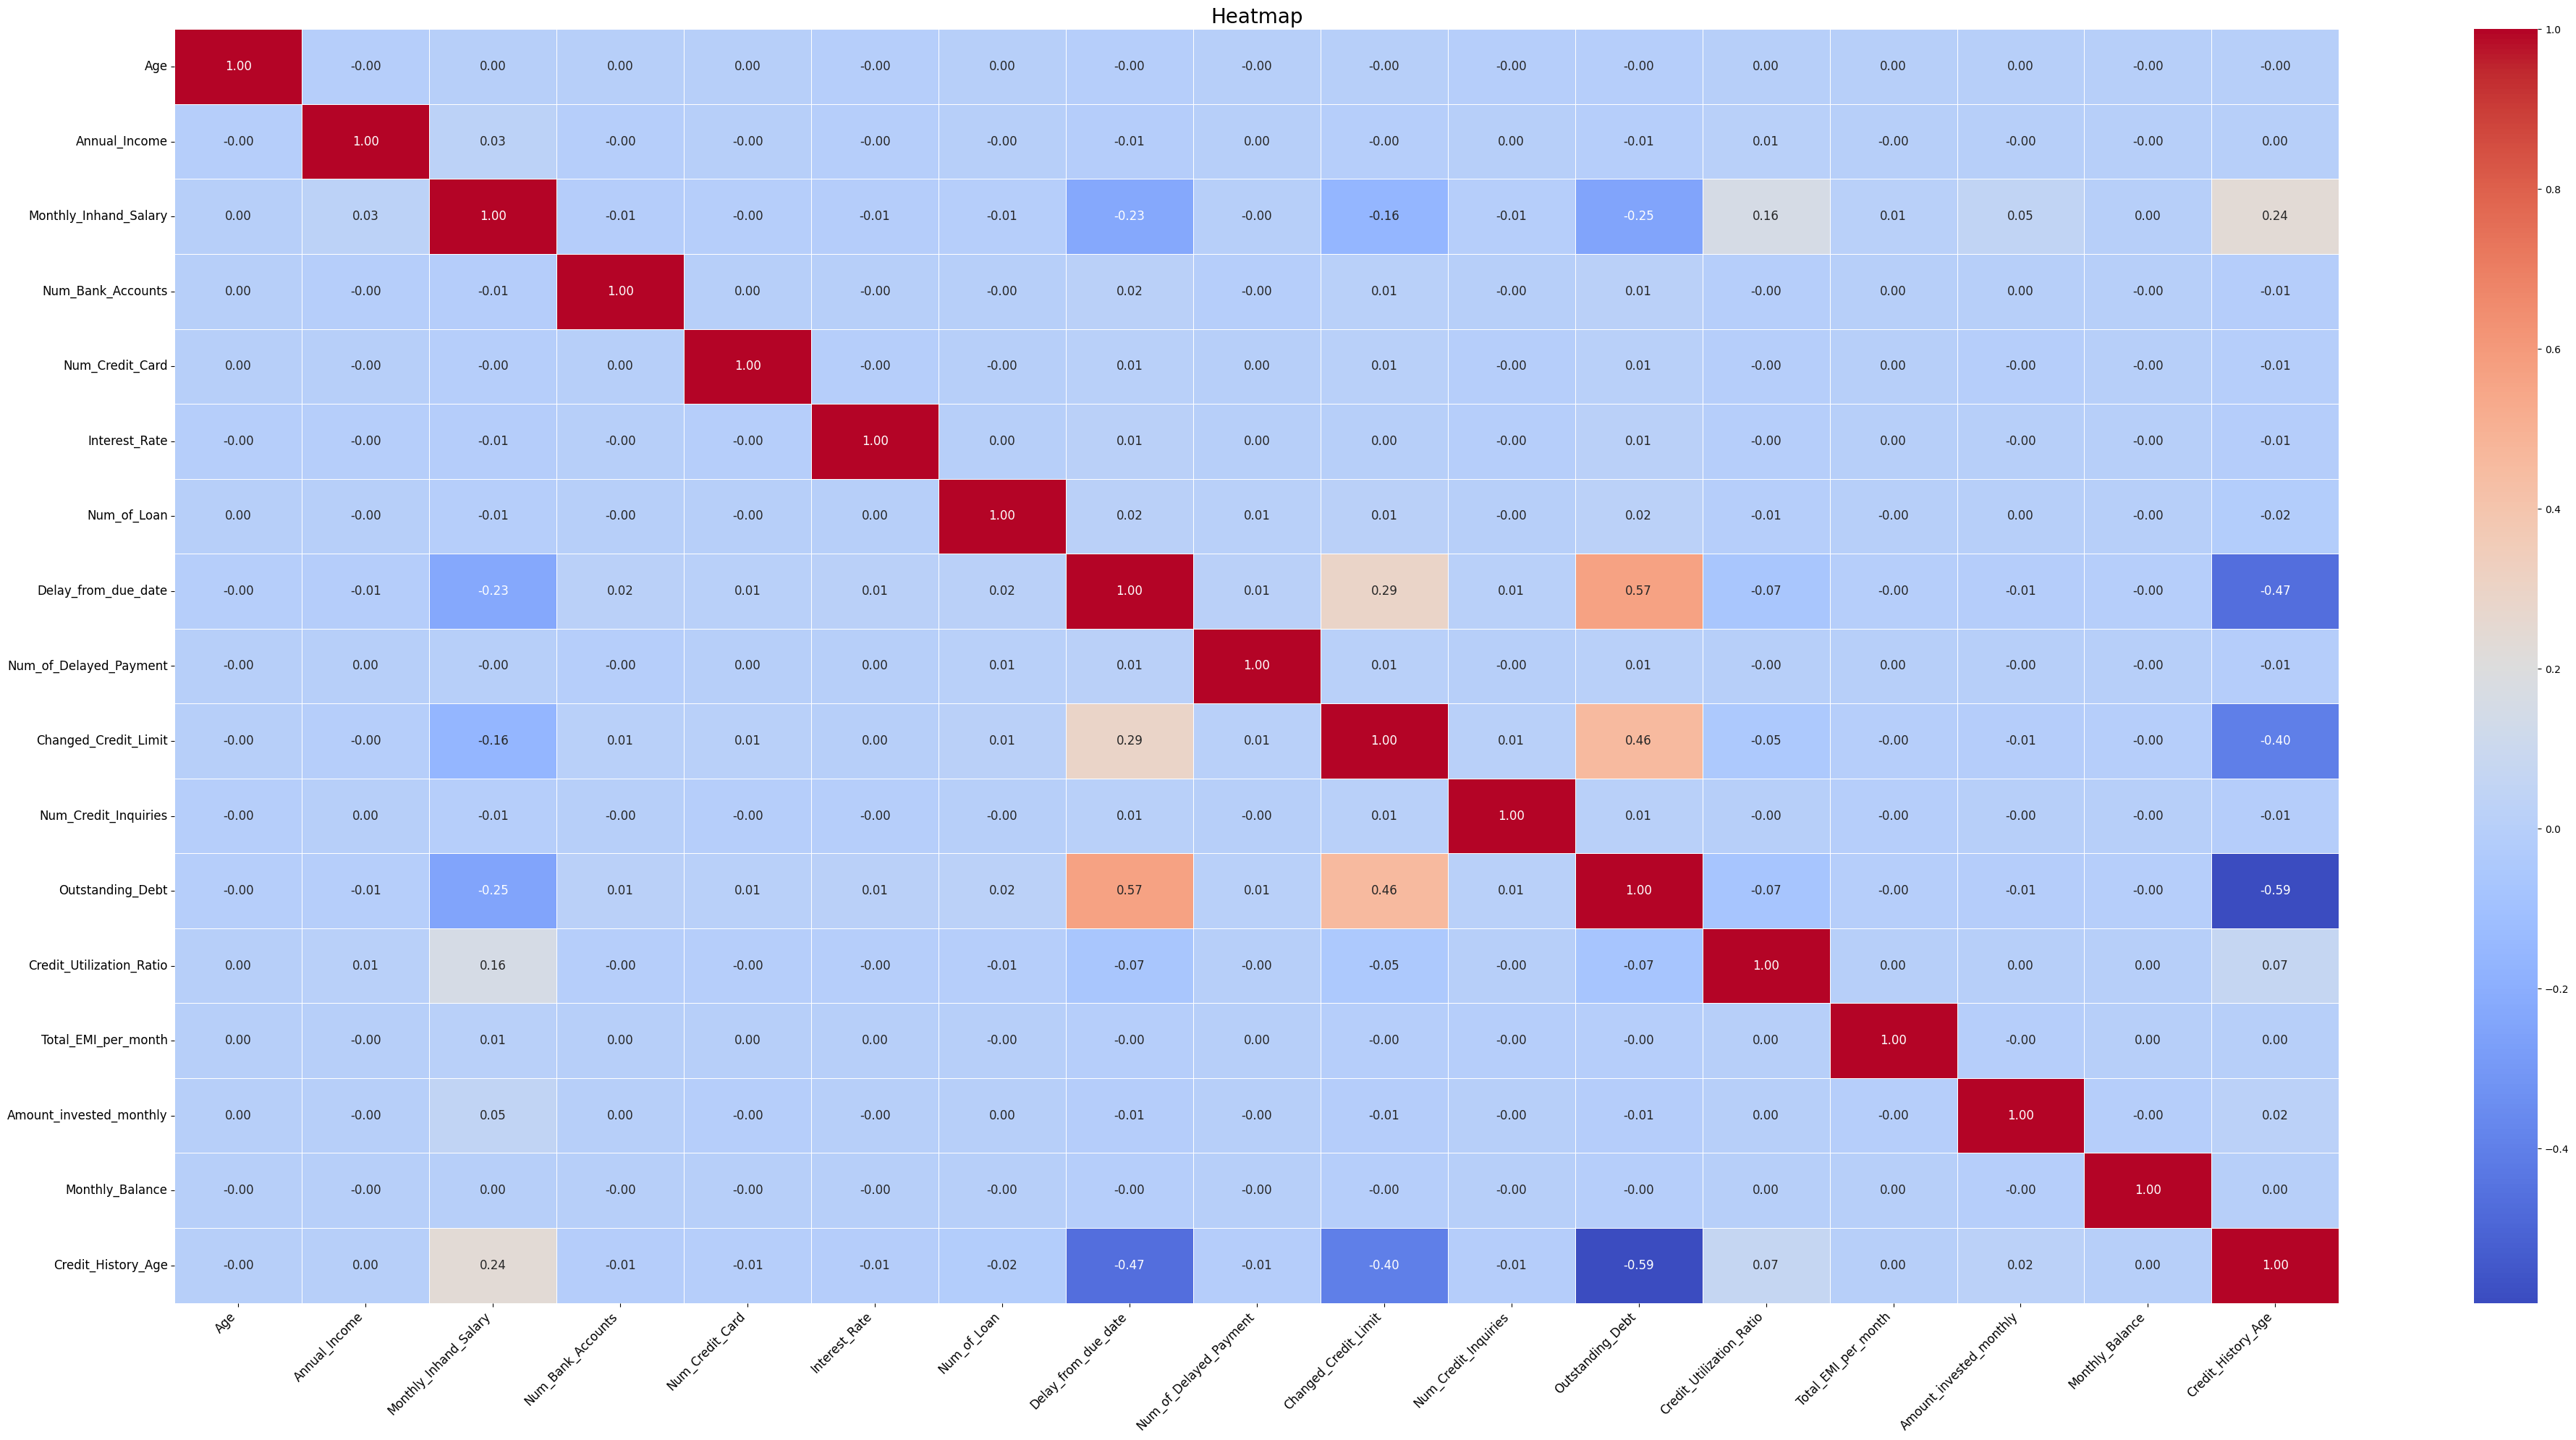

In [40]:
plt.figure(figsize=(40, 20))  # Adjust figure size as needed
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=num_cols, yticklabels=num_cols,
            linewidths=.5, annot_kws={"size": 12})

plt.title("Heatmap", fontsize=20)  # Increase title font size
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)  # Adjust y-axis label font size
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

##Categorical Column preprocessing

In [41]:
for column in df.columns:
    unique_elements = df[column].unique()
    print(f"Unique elements in column '{column}': {unique_elements}")

Unique elements in column 'ID': ['0x1602' '0x1603' '0x1604' ... '0x25fef' '0x25ff0' '0x25ff1']
Unique elements in column 'Customer_ID': ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0x30e8' 'CUS_0xb5b5'
 'CUS_0xbb53']
Unique elements in column 'Month': ['January' 'February' 'March' 'April' 'May' 'July' 'August' 'June'
 'September' 'October' 'November' 'December']
Unique elements in column 'Name': ['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Hollu' 'Patrick Ruckers'
 'Robj']
Unique elements in column 'Age': [  23  500   28 ...  326 7910 5826]
Unique elements in column 'SSN': ['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '978-24-2354' '875-86-2440'
 '671-00-6399']
Unique elements in column 'Occupation': ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Unique elements in column 'Annual_Income': [   19114    34847   143162 ... 10681037 12608143   250738]

In [42]:
#Showing unique elements from each column
for column in cat_cols:  # Iterate through categorical columns only
    unique_elements = df[column].unique()

    # Format output for better readability
    print(f"\nColumn: {column}")  # Print column name with a newline
    print("-" * 20)  # Print a separator line

    if len(unique_elements) <= 20:  # Limit display if too many unique elements
        print(f"  Unique Elements: {unique_elements}")
    else:
        print(f"  Unique Elements (Count: {len(unique_elements)}): Too many to display.")


Column: Occupation
--------------------
  Unique Elements: ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

Column: Credit_Mix
--------------------
  Unique Elements: ['_' 'Good' 'Standard' 'Bad']

Column: Spending_Level
--------------------
  Unique Elements: ['High' 'Low']

Column: Payment_Value
--------------------
  Unique Elements: ['Small' 'Large' 'Medium']

Column: Payment_of_Min_Amount
--------------------
  Unique Elements: ['No' 'NM' 'Yes']


In [43]:
#Removing useless value like '_'
def remove_underscore_rows(df, column_name):

    filtered_df = df[~df[column_name].str.contains('_', na=False)]

    removed_rows = len(df) - len(filtered_df)
    print(f"{column_name} column removed {removed_rows} rows.")

    return filtered_df

for col in cat_cols:
    df = remove_underscore_rows(df, col)


Occupation column removed 18285 rows.
Credit_Mix column removed 24021 rows.
Spending_Level column removed 0 rows.
Payment_Value column removed 0 rows.
Payment_of_Min_Amount column removed 0 rows.


In [44]:
for column in cat_cols:  # Iterate through categorical columns only
    unique_count = df[column].nunique()  # Get the count of unique values

    # Format output for better readability
    print(f"\nColumn: {column}")  # Print column name with a newline
    print("-" * 20)  # Print a separator line
    print(f"  Unique Value Count: {unique_count}")  # Print the count of unique values


Column: Occupation
--------------------
  Unique Value Count: 14

Column: Credit_Mix
--------------------
  Unique Value Count: 3

Column: Spending_Level
--------------------
  Unique Value Count: 2

Column: Payment_Value
--------------------
  Unique Value Count: 3

Column: Payment_of_Min_Amount
--------------------
  Unique Value Count: 3


Number of each unique elements from each solumn

In [45]:
for column in cat_cols:  # Iterate through categorical columns only
    unique_counts = df[column].value_counts()

    # Format output for better readability
    print(f"\nColumn: {column}")  # Print column name with a newline
    print("-" * 20)  # Print a separator line

    for element, count in unique_counts.items():  # Iterate through unique elements and counts
        print(f"  {element}: {count}")  # Print element and its count


Column: Occupation
--------------------
  Lawyer: 7267
  Architect: 7089
  Engineer: 7016
  Accountant: 6997
  Mechanic: 6988
  Scientist: 6949
  Developer: 6879
  Entrepreneur: 6834
  Teacher: 6828
  Journalist: 6745
  Doctor: 6716
  Manager: 6541
  Musician: 6521
  Writer: 6446

Column: Credit_Mix
--------------------
  Standard: 43823
  Good: 29263
  Bad: 22730

Column: Spending_Level
--------------------
  Low: 51497
  High: 44319

Column: Payment_Value
--------------------
  Small: 38123
  Medium: 32641
  Large: 25052

Column: Payment_of_Min_Amount
--------------------
  Yes: 49975
  No: 34344
  NM: 11497


In [46]:
#Only need Boolean dtype
replace = {"NM": "No"}
df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].replace(replace)

In [47]:
df["Payment_of_Min_Amount"].value_counts()

,count
Payment_of_Min_Amount,
Yes,49975
No,45841


In [48]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46200 entries, 0 to 49999
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        46200 non-null  object 
 1   Customer_ID               46200 non-null  object 
 2   Month                     46200 non-null  object 
 3   Name                      41559 non-null  object 
 4   Age                       46200 non-null  object 
 5   SSN                       46200 non-null  object 
 6   Occupation                46200 non-null  object 
 7   Annual_Income             46200 non-null  object 
 8   Monthly_Inhand_Salary     39251 non-null  float64
 9   Num_Bank_Accounts         46200 non-null  int64  
 10  Num_Credit_Card           46200 non-null  int64  
 11  Interest_Rate             46200 non-null  int64  
 12  Num_of_Loan               46200 non-null  object 
 13  Type_of_Loan              40897 non-null  object 
 14  Delay_from_

Hypothesis Testing with Chi-Square and F-Tests
This Python code defines a chi_2_test function that conducts hypothesis testing to assess the relationship between categorical and numerical columns in a DataFrame and the target variable 'Credit_Score.'

Function Purpose: The chi_2_test function first prepares a copy of the DataFrame with only training data and selects categorical and numerical columns of interest. It then initializes an empty NumPy array to store test results. The function performs two types of tests: Chi-Square tests for categorical columns and F-tests (ANOVA) for numerical columns to assess their significance in explaining 'Credit_Score' variations.

Hypothesis Testing: The Chi-Square test evaluates the independence between categorical variables and 'Credit_Score,' while the F-tests assess the variance in 'Credit_Score' explained by numerical variables. The results include the test statistic and p-value for each column, helping identify significant factors influencing 'Credit_Score.'

This function provides valuable insights into how different features relate to 'Credit_Score,' aiding in feature selection and understanding the dataset's predictive power in credit scoring analysis or modeling.

In [49]:
#define whole dataframe is use for trainning modole
df['is_train'] = True


A chi-square (χ2) statistic is a test that measures how a model compares to actual observed data. The data used in calculating a chi-square statistic must be random, raw, mutually exclusive, drawn from independent variables, and drawn from a large enough sample. For example, the results of tossing a fair coin meet these criteria.

## Statistic Calulation


### Mesures

#### Numercal Columns

In [50]:
df[num_cols].mean()

,0
Age,1.198426e+02
Annual_Income,1.741760e+05
Monthly_Inhand_Salary,4.028869e+03
Num_Bank_Accounts,1.675563e+01
Num_Credit_Card,2.245497e+01
Interest_Rate,7.330130e+01
Num_of_Loan,1.099375e+01
Delay_from_due_date,2.101673e+01
Num_of_Delayed_Payment,2.979799e+01
Changed_Credit_Limit,9.927538e+00


In [51]:
df[num_cols].cov()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age
Age,4.693214e+05,1.306737e+06,1.260014e+04,1.890250e+01,1.082744e+01,-3.229438e+02,3.804048e+01,-4.200650e+01,3.723892e+02,-5.384481e+00,-1.092042e+02,-2.015231e+03,1.170467e+01,3.020797e+03,9.351770e+03,-2.895948e+24,-7.678788e+00
Annual_Income,1.306737e+06,2.000243e+12,1.146296e+08,-5.400738e+05,1.430396e+05,2.387881e+05,1.365681e+05,-1.697252e+05,2.355795e+05,-4.245868e+04,1.942866e+06,-7.760686e+06,3.411637e+04,5.681789e+06,-2.042302e+05,-4.074231e+27,7.327209e+02
Monthly_Inhand_Salary,1.260014e+04,1.146296e+08,8.728654e+06,-4.184466e+03,-8.553042e+02,-9.643642e+03,-9.072172e+02,-9.997230e+03,-7.517275e+02,-3.167320e+03,-3.430767e+03,-8.392217e+05,2.337105e+03,1.947859e+05,3.317199e+05,1.978598e+25,5.506178e+03
Num_Bank_Accounts,1.890250e+01,-5.400738e+05,-4.184466e+03,1.355278e+04,2.939392e+01,-8.717423e+01,-2.164512e+01,2.814677e+01,2.746239e+00,8.461424e+00,-2.261912e+01,2.104549e+03,-1.968625e+00,-2.299547e+03,-2.649993e+02,-4.402799e+23,-1.183273e+01
Num_Credit_Card,1.082744e+01,1.430396e+05,-8.553042e+02,2.939392e+01,1.637165e+04,-1.301259e+02,-3.203178e+00,1.165446e+01,8.091727e+01,2.265270e+00,-7.082645e+00,4.732141e+02,-1.274083e+00,2.668437e+03,-3.068179e+02,-6.002876e+23,-4.942176e+00
Interest_Rate,-3.229438e+02,2.387881e+05,-9.643642e+03,-8.717423e+01,-1.301259e+02,2.207930e+05,-1.742500e+01,8.629076e+01,2.596183e+02,7.039325e+00,-1.699578e+02,4.380786e+03,-1.967470e+01,-4.336233e+03,-2.048282e+03,-2.167416e+24,-4.201627e+01
Num_of_Loan,3.804048e+01,1.365681e+05,-9.072172e+02,-2.164512e+01,-3.203178e+00,-1.742500e+01,4.066777e+03,1.143149e+01,1.038905e+02,3.624501e+00,1.593915e+01,1.266376e+03,-1.038927e+00,-6.039188e+02,3.915629e+02,-2.607020e+23,-8.148399e+00
Delay_from_due_date,-4.200650e+01,-1.697252e+05,-9.997230e+03,2.814677e+01,1.165446e+01,8.629076e+01,1.143149e+01,2.197766e+02,4.877714e+01,2.832061e+01,2.003959e+01,9.680002e+03,-4.931478e+00,-1.250508e+02,-3.552450e+02,-2.858540e+23,-5.416933e+01
Num_of_Delayed_Payment,3.723892e+02,2.355795e+05,-7.517275e+02,2.746239e+00,8.091727e+01,2.596183e+02,1.038905e+02,4.877714e+01,4.743660e+04,1.280233e+01,-1.092509e+02,2.663938e+03,-1.303745e+00,-2.905029e+03,-5.127426e+02,-6.783206e+23,-2.280099e+01
Changed_Credit_Limit,-5.384481e+00,-4.245868e+04,-3.167320e+03,8.461424e+00,2.265270e+00,7.039325e+00,3.624501e+00,2.832061e+01,1.280233e+01,4.354431e+01,9.165555e+00,3.472448e+03,-1.651854e+00,-1.365537e+02,-1.719127e+02,2.687338e+22,-2.105794e+01


In [52]:
df[num_cols].var()

,0
Age,4.693214e+05
Annual_Income,2.000243e+12
Monthly_Inhand_Salary,8.728654e+06
Num_Bank_Accounts,1.355278e+04
Num_Credit_Card,1.637165e+04
Interest_Rate,2.207930e+05
Num_of_Loan,4.066777e+03
Delay_from_due_date,2.197766e+02
Num_of_Delayed_Payment,4.743660e+04
Changed_Credit_Limit,4.354431e+01


In [53]:
corr_matrix = df[num_cols].corr().abs()  # Get absolute correlations
np.fill_diagonal(corr_matrix.values, 0)  # Ignore self-correlation (1.0 on diagonal)

max_corr_value = corr_matrix.max().max()  # Get the max value < 1.0
print(f"Maximum correlation (excluding self-correlation): {max_corr_value:.2f}")


Maximum correlation (excluding self-correlation): 0.60


In [54]:
import pandas as pd

def analyze_features(data):
    feature_info = {}

    for column in data.columns:
        col_type = data[column].dtype

        # Identify quantitative vs qualitative
        if pd.api.types.is_numeric_dtype(data[column]):
            quantitative = True
            # Identify continuous vs discrete
            if data[column].nunique() / len(data) > 0.05:
                feature_type = "Continuous"
            else:
                feature_type = "Discrete"
        else:
            quantitative = False
            feature_type = "Qualitative"

        feature_info[column] = {
            "Quantitative": quantitative,
            "Feature Type": feature_type
        }

    return pd.DataFrame(feature_info).T

# Example usage:
file_path = "/content/full.csv"  # Update with your file path
data = pd.read_csv(file_path)
feature_analysis = analyze_features(data)
print(feature_analysis)


                         Quantitative Feature Type
ID                              False  Qualitative
Customer_ID                     False  Qualitative
Month                           False  Qualitative
Name                            False  Qualitative
Age                             False  Qualitative
SSN                             False  Qualitative
Occupation                      False  Qualitative
Annual_Income                   False  Qualitative
Monthly_Inhand_Salary            True   Continuous
Num_Bank_Accounts                True     Discrete
Num_Credit_Card                  True     Discrete
Interest_Rate                    True     Discrete
Num_of_Loan                     False  Qualitative
Type_of_Loan                    False  Qualitative
Delay_from_due_date              True     Discrete
Num_of_Delayed_Payment          False  Qualitative
Changed_Credit_Limit            False  Qualitative
Num_Credit_Inquiries             True     Discrete
Credit_Mix                     

In [55]:

# Example: Load a DataFrame from a CSV file
df = pd.read_csv('full.csv')

# Classify columns based on their data types
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(exclude=['number']).columns.tolist()

# Prepare the classification data
classification_data = []
for col in df.columns:
    if col in num_cols:
        classification_data.append([col, 'Numerical'])
    else:
        classification_data.append([col, 'Categorical'])

# Create a DataFrame to display the table
classification_df = pd.DataFrame(classification_data, columns=['Column Name', 'Type'])

# Display the classification table
print(classification_df)


                 Column Name         Type
0                         ID  Categorical
1                Customer_ID  Categorical
2                      Month  Categorical
3                       Name  Categorical
4                        Age  Categorical
5                        SSN  Categorical
6                 Occupation  Categorical
7              Annual_Income  Categorical
8      Monthly_Inhand_Salary    Numerical
9          Num_Bank_Accounts    Numerical
10           Num_Credit_Card    Numerical
11             Interest_Rate    Numerical
12               Num_of_Loan  Categorical
13              Type_of_Loan  Categorical
14       Delay_from_due_date    Numerical
15    Num_of_Delayed_Payment  Categorical
16      Changed_Credit_Limit  Categorical
17      Num_Credit_Inquiries    Numerical
18                Credit_Mix  Categorical
19          Outstanding_Debt  Categorical
20  Credit_Utilization_Ratio    Numerical
21        Credit_History_Age  Categorical
22     Payment_of_Min_Amount  Cate

In [56]:
num_df = df.select_dtypes(include=[np.number])

# Calculate statistics
means = num_df.mean()
variances = num_df.var()
cov_matrix = num_df.cov()
corr_matrix = num_df.corr()

# Combine mean and variance into one table
stats_df = pd.DataFrame({
    'Mean': means,
    'Variance': variances
})

# Display the stats table
print("\n=== Mean and Variance Table ===")
print(stats_df.round(3))  # Round for cleaner display

# Find the most correlated pair (excluding self-correlation)
corr_unstacked = corr_matrix.abs().where(~np.eye(corr_matrix.shape[0], dtype=bool))
max_corr_pair = corr_unstacked.stack().idxmax()
max_corr_value = corr_matrix.loc[max_corr_pair]

print("\n=== Highest Correlation Pair ===")
print(f"Feature Pair: {max_corr_pair}")
print(f"Correlation Value: {max_corr_value:.3f}")


=== Mean and Variance Table ===
                              Mean      Variance
Monthly_Inhand_Salary     4190.115  1.011551e+07
Num_Bank_Accounts           17.007  1.370526e+04
Num_Credit_Card             22.623  1.667792e+04
Interest_Rate               71.235  2.130166e+05
Delay_from_due_date         21.063  2.208240e+02
Num_Credit_Inquiries        28.529  3.781316e+04
Credit_Utilization_Ratio    32.283  2.614600e+01
Total_EMI_per_month       1432.514  7.062318e+07

=== Highest Correlation Pair ===
Feature Pair: ('Monthly_Inhand_Salary', 'Delay_from_due_date')
Correlation Value: -0.250


#### Categorical Columns

In [57]:
#Encoded
train_df_cleaned = train_df.dropna()
test_df_cleaned = test_df.dropna()

In [58]:

X = train_df_cleaned.drop(columns=['Credit_Score'])
y = train_df_cleaned['Credit_Score']
X_test = test_df_cleaned

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [59]:
label_encoder = LabelEncoder() #Label Encoder is module from Scikit-learn framework

y_train_encoded = label_encoder.fit_transform(y_train) #Apply encoder to the dataset
y_val_encoded = label_encoder.transform(y_val) # appl

In [60]:
for i, class_name in enumerate(label_encoder.classes_):
    print(f"Class '{class_name}' is encoded as {i}")

Class 'Good' is encoded as 0
Class 'Poor' is encoded as 1
Class 'Standard' is encoded as 2


In [61]:
num_cols = X.select_dtypes(exclude=['object']).columns.tolist()
one_hot_cols = ["Occupation", "Payment_of_Min_Amount"]
ordinal_cols = ["Credit_Mix", "Spending_Level", "Payment_Value"]

ordinal_categories = [
    ['Bad', 'Standard', 'Good'],
    ['Low', 'High'],
    ['Small', 'Medium', 'Large']
]

In [62]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_cols),
        ('one_hot_enc', OneHotEncoder(handle_unknown='ignore'), one_hot_cols),
        ('ordinal_enc', OrdinalEncoder(categories=ordinal_categories, handle_unknown="use_encoded_value", unknown_value=-1), ordinal_cols)
    ]
)

In [63]:
stats = {}

# Encode and calculate stats
for col in cat_cols:
    le = LabelEncoder()
    encoded = le.fit_transform(df[col].astype(str))
    mean_val = encoded.mean()
    var_val = encoded.var()
    stats[col] = {'Mean': mean_val, 'Variance': var_val}

# Convert to DataFrame for display
cat_stats_df = pd.DataFrame(stats).T
print(cat_stats_df)

                                 Mean      Variance
ID                       74999.500000  1.875000e+09
Customer_ID               6249.500000  1.302083e+07
Month                        5.500000  1.191667e+01
Name                      5579.738867  9.880825e+06
Age                        777.678407  1.403273e+05
SSN                       5901.516673  1.434810e+07
Occupation                   7.514713  2.149929e+01
Annual_Income            10690.888187  3.761290e+07
Num_of_Loan                277.067027  3.247257e+04
Type_of_Loan              3513.769280  3.901111e+06
Num_of_Delayed_Payment     395.822140  1.367776e+05
Changed_Credit_Limit      2779.543440  1.730586e+06
Credit_Mix                   1.575420  1.024912e+00
Outstanding_Debt          6815.773667  1.553227e+07
Credit_History_Age         216.065880  1.483132e+04
Payment_of_Min_Amount        1.403227  4.806349e-01
Amount_invested_monthly  74142.397267  1.797409e+09
Payment_Behaviour            3.466013  4.140525e+00
Monthly_Bala

In [40]:
#Unique Label
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Print unique values in each categorical column
for col in categorical_cols:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 40)

Column: ID
['0x1602' '0x1603' '0x1604' ... '0x25fef' '0x25ff0' '0x25ff1']
----------------------------------------
Column: Customer_ID
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']
----------------------------------------
Column: Month
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
----------------------------------------
Column: Name
['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']
----------------------------------------
Column: Age
['23' '-500' '28_' ... '326' '7910' '5826']
----------------------------------------
Column: SSN
['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990']
----------------------------------------
Column: Occupation
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer'

In [65]:
#Apply Label Encoded
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col].astype(str))
    label_encoders[col] = le

In [68]:
# Mean and variance
for col in cat_cols:
    print(f"{col} (Mean): {train_df[col].mean():.2f}, Variance: {train_df[col].var():.2f}")

# Covariance matrix of encoded categorical columns
print("\nCovariance Matrix:")
print(train_df[cat_cols].cov())

Occupation (Mean): 7.52, Variance: 21.53
Credit_Mix (Mean): 1.58, Variance: 1.03
Spending_Level (Mean): 0.54, Variance: 0.25
Payment_Value (Mean): 1.14, Variance: 0.64
Payment_of_Min_Amount (Mean): 1.40, Variance: 0.48

Covariance Matrix:
                       Occupation  Credit_Mix  Spending_Level  Payment_Value  \
Occupation              21.532169    0.023484        0.008870      -0.000340   
Credit_Mix               0.023484    1.027228       -0.010962      -0.015781   
Spending_Level           0.008870   -0.010962        0.248486       0.089174   
Payment_Value           -0.000340   -0.015781        0.089174       0.641257   
Payment_of_Min_Amount   -0.015061   -0.006815        0.017337       0.028579   

                       Payment_of_Min_Amount  
Occupation                         -0.015061  
Credit_Mix                         -0.006815  
Spending_Level                      0.017337  
Payment_Value                       0.028579  
Payment_of_Min_Amount               0.481132 

In [69]:
def chi_2_test(df: pd.DataFrame, cat_cols: list, num_cols: list):
    # Assuming that 'Credit_Score' and 'is_train' columns are in the DataFrame.
    df_copy = df.loc[df["is_train"]].copy()

    summary = np.empty((len(cat_cols) + len(num_cols), 3), dtype="object") #Create an empty numpy array to store the result, 3 value (col_nmae, t_stat, and p-value will be stored)
    y, *_ = df_copy["Credit_Score"].factorize(sort=False) # cat_cole --> num_col to do t-statistic


    #Testing if categorical_vol has relation with numerical_col
    def perform_test(cols, test): #The type of test to perform ("chi2" for categorical variables and "f_classif" for numerical variables).
        if test == "chi2":
            for i, col in enumerate(cols):
                cross = pd.crosstab(index=df_copy[col], columns=[df_copy["Credit_Score"]]) # Applies chi2_contingency() from scipy.stats to compute the Chi-square test statistic and p-value.
                t_stat, pvalue, *_ = chi2_contingency(cross)
                summary[i, :] = [col, t_stat, pvalue] # showing summary

        elif test == "f_classification":
            for i, col in enumerate(cols, start=len(cat_cols)): #operating theory testing
                t_stat, pvalue = f_classif(df_copy[[col]], y.reshape(-1, 1))
                summary[i, :] = [col, t_stat[0], pvalue[0]]


    #Perform the test
    perform_test(cat_cols, test="chi2")


    perform_test(num_cols, test="f_classif")

    # Return results as a DataFrame
    return pd.DataFrame(
        data=summary,
        columns=["column", 't-statistic', "p-value"]
    )

# Assuming cat_cols and num_cols are already defined
chi2_summary = chi_2_test(df, cat_cols, num_cols).sort_values(by="t-statistic", ascending=False)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95816 entries, 1 to 49998
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        95816 non-null  object 
 1   Customer_ID               95816 non-null  object 
 2   Month                     95816 non-null  object 
 3   Name                      86252 non-null  object 
 4   Age                       95816 non-null  int64  
 5   SSN                       95816 non-null  object 
 6   Occupation                95816 non-null  object 
 7   Annual_Income             95816 non-null  int64  
 8   Monthly_Inhand_Salary     95816 non-null  float64
 9   Num_Bank_Accounts         95816 non-null  int64  
 10  Num_Credit_Card           95816 non-null  int64  
 11  Interest_Rate             95816 non-null  int64  
 12  Num_of_Loan               95816 non-null  int64  
 13  Type_of_Loan              85009 non-null  object 
 14  Delay_from_

We can see 5 biggest t-stat values, which represent for big impact those column contact to theory

In [71]:
chi2_summary.style.bar("t-statistic").background_gradient(
    "Blues", subset="t-statistic")

TypeError: unsupported operand type(s) for -: 'NoneType' and 'int'

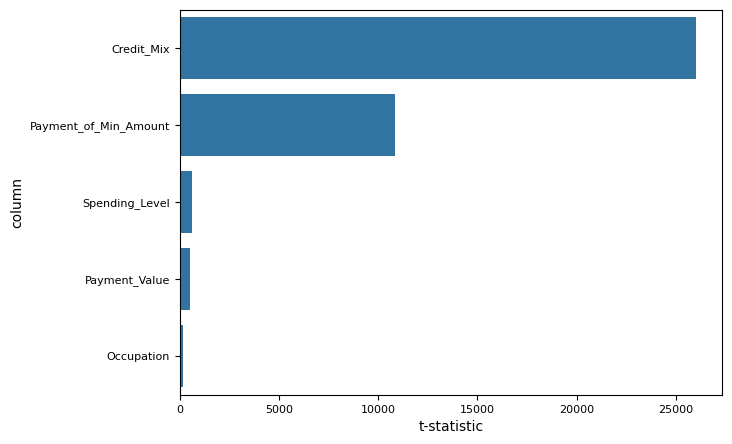

In [72]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(data=chi2_summary, y="column", x="t-statistic", ax=ax)
plt.setp([ax.get_xticklabels(), ax.get_yticklabels()], size=8)
fig.show()

In [73]:
#Remove insignificant column

# Filter out columns with p-value > 0.1
significant_cols = chi2_summary[chi2_summary['p-value'] <= 0.1]['column'].tolist()

# Keep only the significant columns in your original DataFrame (df)
df = df[significant_cols + target_col]

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95816 entries, 1 to 49998
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Credit_Mix             95816 non-null  object
 1   Payment_of_Min_Amount  95816 non-null  object
 2   Spending_Level         95816 non-null  object
 3   Payment_Value          95816 non-null  object
 4   Occupation             95816 non-null  object
 5   Credit_Score           63580 non-null  object
dtypes: object(6)
memory usage: 5.1+ MB


In [75]:
# Already fill the whole column by True
# df[df["is_train"] == False]["Credit_Score"].isna().sum()


In [76]:
# df[df["is_train"] == True]["Credit_Score"].isna().sum()

In [77]:
print(df.columns)

Index(['Credit_Mix', 'Payment_of_Min_Amount', 'Spending_Level',
       'Payment_Value', 'Occupation', 'Credit_Score'],
      dtype='object')


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95816 entries, 1 to 49998
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Credit_Mix             95816 non-null  object
 1   Payment_of_Min_Amount  95816 non-null  object
 2   Spending_Level         95816 non-null  object
 3   Payment_Value          95816 non-null  object
 4   Occupation             95816 non-null  object
 5   Credit_Score           63580 non-null  object
dtypes: object(6)
memory usage: 5.1+ MB


## PCA

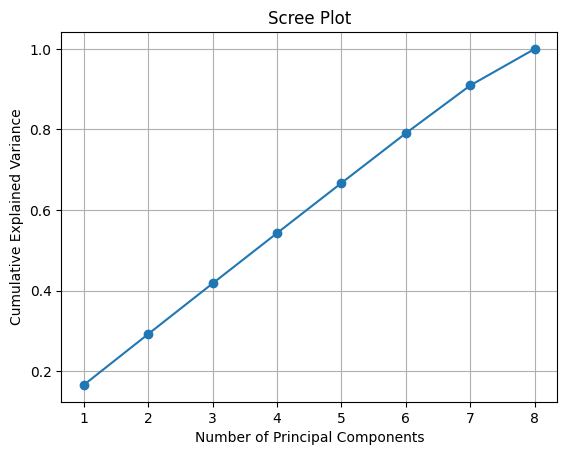

In [67]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Standardize
X_scaled = StandardScaler().fit_transform(train_df_cleaned[num_cols])

# PCA
pca = PCA()
pca.fit(X_scaled)

# Scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.grid(True)
plt.show()


In [68]:
explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.16579395, 0.12636315, 0.12569604, 0.12488327, 0.12444111,
       0.12358642, 0.11869664, 0.09053944])

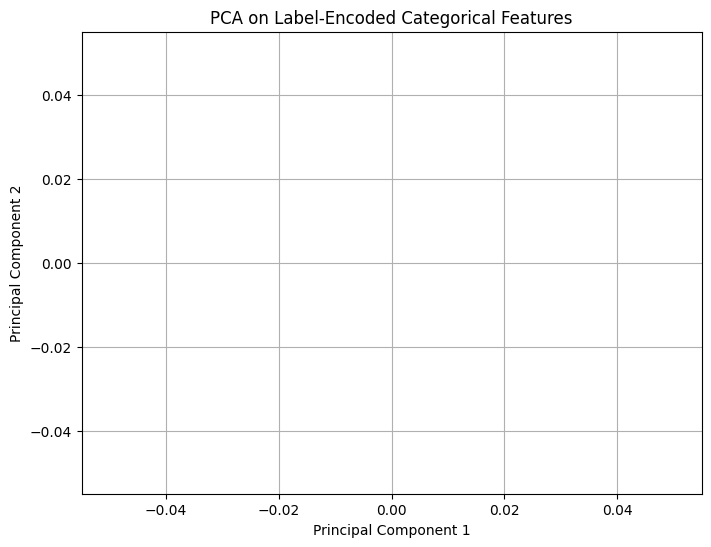

In [78]:
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Optional: Standardize
scaler = StandardScaler()
df = df.dropna()
encoded_scaled = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)
encoded_pca = pca.fit_transform(df)

# Create DataFrame for visualization
pca_df = pd.DataFrame(df, columns=['PC1', 'PC2'])

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2')
plt.title('PCA on Label-Encoded Categorical Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [79]:
df.to_csv("clean_data.csv", index=False)

In [ ]:
train_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Spending_Level,Payment_Value
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,High,Small
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,Low,Large
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,Low,Medium
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,Low,Small
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,High,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0x25fe8,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,410.256158,Poor,High,Medium
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor,High,Large
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor,High,Medium
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor,High,Large


In [ ]:
test_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Spending_Level,Payment_Value
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772,Low,Small
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196,High,Medium
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997,Low,Medium
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634,High,Medium
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923,High,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343,Low,Small
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066,Low,Small
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098,Low,Large
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717,High,Small


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_cols),
        ('one_hot_enc', OneHotEncoder(handle_unknown='ignore'), one_hot_cols),
        ('ordinal_enc', OrdinalEncoder(categories=ordinal_categories, handle_unknown="use_encoded_value", unknown_value=-1), ordinal_cols)
    ]
)

In [ ]:
X_train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Spending_Level,Payment_Value
60975,0x17b45,CUS_0x7d42,August,Zhoul,40_,597-29-6705,Scientist,18770.3,1514.191667,1,...,594.5,36.515815,29 Years and 0 Months,No,34.849055,134.33295781983543,Low_spent_Small_value_payments,272.23715404884246,Low,Small
76201,0x1d47f,CUS_0x68d9,February,Steve Slaterk,27,580-48-2588,Writer,68561.31,5594.442500,6,...,93.67,31.160334,30 Years and 0 Months,Yes,58.021274,184.8452474303949,High_spent_Medium_value_payments,566.5777288993952,High,Medium
80976,0x1f07a,CUS_0x324b,January,Jeffreyk,20,376-98-8873,Entrepreneur,14773.91,1423.159167,6,...,2370.05,36.495615,9 Years and 5 Months,Yes,29.479970,92.05535561277199,Low_spent_Large_value_payments,290.78059115296867,Low,Large
46644,0x1274e,CUS_0x43fd,May,Maja Wallengrenl,23,235-91-8341,_______,71096.02,6140.668333,6,...,1494.93,35.153099,24 Years and 5 Months,No,31.192333,317.07837158237163,Low_spent_Medium_value_payments,545.7961289261679,Low,Medium
40456,0x1030e,CUS_0x1cc4,January,Xinc,46,541-42-6554,Lawyer,45034.34,4021.861667,4,...,36.56,29.168812,22 Years and 10 Months,No,48.726394,242.33413870915672,Low_spent_Large_value_payments,381.12563417973405,Low,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27135,0xb4fd,CUS_0x5528,August,Edwin Chanx,20,#F%$D@*&8,Lawyer,20701.48,1909.123333,8,...,3341.62,38.992471,10 Years and 8 Months,Yes,119.736866,34.572235253283424,High_spent_Medium_value_payments,286.60323210547716,High,Medium
38788,0xf946,CUS_0x355c,May,Ricko,30,244-48-6204,Lawyer,18750.54,1649.545000,10,...,1668.49,30.118820,6 Years and 7 Months,Yes,54.079318,165.23837594112018,Low_spent_Medium_value_payments,225.63680639543045,Low,Medium
3522,0x2aa4,CUS_0x8d4f,March,Kazunori Takadas,18,666-08-2872,Entrepreneur,7106.15,592.179167,6,...,2688.12,26.612564,19 Years and 0 Months,Yes,9.575855,40.082858847776905,Low_spent_Small_value_payments,299.5592030626011,Low,Small
61552,0x17eaa,CUS_0xf8b,January,Agrawaly,40,779-60-0339,Developer,43922.32,3869.193333,2,...,233.83,32.027505,22 Years and 3 Months,No,66.540929,155.69231151764353,High_spent_Medium_value_payments,414.686093041177,High,Medium


In [ ]:
test_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Spending_Level,Payment_Value
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772,Low,Small
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196,High,Medium
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997,Low,Medium
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634,High,Medium
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923,High,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343,Low,Small
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066,Low,Small
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098,Low,Large
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717,High,Small


In [ ]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_train = pipeline.fit_transform(X_train)
X_val = pipeline.transform(X_val)
X_test = pipeline.transform(X_test)

#SMOTE

In [ ]:
from collections import Counter
print("Before:", Counter(y_train_encoded))
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)
print("After:", Counter(y_train_resampled))

Before: Counter({np.int64(2): 20719, np.int64(1): 12230, np.int64(0): 6347})
After: Counter({np.int64(0): 20719, np.int64(2): 20719, np.int64(1): 20719})


# ANN

In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred_probabilities = model.predict(X_train)
    y_train_pred = y_train_pred_probabilities.argmax(axis=1)
    y_pred_probabilities = model.predict(X_test)
    y_pred = y_pred_probabilities.argmax(axis=1)

    print("Test Set:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    print("\nTrain Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
model = Sequential([
    Dense(512, activation='relu'),
    BatchNormalization(),


    Dense(512, activation='relu'),
    BatchNormalization(),

    Dense(256, activation='relu'),
    BatchNormalization(),


    Dense(256, activation='relu'),
    BatchNormalization(),


    Dense(128, activation='relu'),
    BatchNormalization(),


    Dense(64, activation='relu'),
    BatchNormalization(),


    Dense(64, activation='relu'),
    BatchNormalization(),


    Dense(32, activation='relu'),
    BatchNormalization(),

    Dense(3, activation='softmax')
])


model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=35,
                               restore_best_weights=True)


history = model.fit(x=X_train_resampled,
                    y=y_train_resampled,
                    validation_data=(X_val, y_val_encoded),
                    validation_split=0.2,
                    batch_size=512,
                    epochs=600,
                    verbose=1,
                    callbacks=[early_stopping])

Epoch 1/600
122/122 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - accuracy: 0.6138 - loss: 0.9023 - val_accuracy: 0.5103 - val_loss: 1.0165
Epoch 2/600
122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.6787 - loss: 0.7580 - val_accuracy: 0.5400 - val_loss: 0.9117
Epoch 3/600
122/122 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.6853 - loss: 0.7356 - val_accuracy: 0.6088 - val_loss: 0.8171
Epoch 4/600
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.6997 - loss: 0.7169 - val_accuracy: 0.6209 - val_loss: 0.8143
Epoch 5/600
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.7040 - loss: 0.6997 - val_accuracy: 0.6224 - val_loss: 0.8515
Epoch 6/600
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.7120 - loss: 0.6841 - val_accuracy: 0.6296 - val_loss: 0.8990
Epoch 7/600
122/122 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.7163 - loss: 0.6729 - val_accuracy: 0.6305 - val_loss: 0.8138
Epoch 8/600
122/122 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.7263 - loss: 0.649

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │        15,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,584,011 (6.04 MB)

 Trainable params: 526,787 (2.01 MB)

 Non-trainable params: 3,648 (14.25 KB)

 Optimizer params: 1,053,576 (4.02 MB)

In [ ]:
eval_metric(model, X_train_resampled,y_train_resampled, X_val, y_val_encoded)

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()